NCR Ride Bookings Preprocessing

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('ncr_ride_bookings.csv')
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [ ]:
#drop irrelevant columns
df.drop(["Booking ID", "Customer ID"], axis=1, inplace=True)

In [ ]:
df['Original_Date'] = pd.to_datetime(df['Date'])
#parse datetime information
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['Weekday'] = df['Datetime'].dt.dayofweek
df['Is_Weekend'] = df['Weekday'].isin([5, 6]).astype(int)

In [ ]:
# Now drop the original Date and Time columns as we've extracted features
df.drop(['Date', 'Time', 'Datetime'], axis=1, inplace=True)

In [ ]:
#handle missing values
# Impute grouped numeric columns by Vehicle Type
for col in ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance']:
    df[col] = df.groupby('Vehicle Type')[col].transform(lambda x: x.fillna(x.median()))

# Impute grouped ratings
for col in ['Driver Ratings', 'Customer Rating']:
    df[col] = df.groupby('Vehicle Type')[col].transform(lambda x: x.fillna(x.mean()))

# Fill logical zeros
df['Cancelled Rides by Customer'] = df['Cancelled Rides by Customer'].fillna(0)
df['Cancelled Rides by Driver'] = df['Cancelled Rides by Driver'].fillna(0)
df['Incomplete Rides'] = df['Incomplete Rides'].fillna(0)

# Fill reason columns
df['Reason for cancelling by Customer'] = df['Reason for cancelling by Customer'].fillna("No Cancellation")
df['Driver Cancellation Reason'] = df['Driver Cancellation Reason'].fillna("No Cancellation")
df['Incomplete Rides Reason'] = df['Incomplete Rides Reason'].fillna("Completed")

# Fill Payment Method
df['Payment Method'] = df['Payment Method'].fillna("Unknown")



In [ ]:
df.head(50)

,Booking Status,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,...,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Original_Date,Hour,Day,Month,Weekday,Is_Weekend
0,No Driver Found,eBike,Palam Vihar,Jhilmil,8.3,28.8,0.0,No Cancellation,0.0,No Cancellation,...,24.210,4.225614,4.403954,Unknown,2024-03-23,12,23,3,5,1
1,Incomplete,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,0.0,No Cancellation,0.0,No Cancellation,...,5.730,4.231812,4.409996,UPI,2024-11-29,18,29,11,4,0
2,Completed,Auto,Khandsa,Malviya Nagar,13.4,25.8,0.0,No Cancellation,0.0,No Cancellation,...,13.580,4.900000,4.900000,Debit Card,2024-08-23,8,23,8,4,0
3,Completed,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,0.0,No Cancellation,0.0,No Cancellation,...,34.020,4.600000,5.000000,UPI,2024-10-21,17,21,10,0,0
4,Completed,Bike,Ghitorni Village,Khan Market,5.3,19.6,0.0,No Cancellation,0.0,No Cancellation,...,48.210,4.100000,4.300000,UPI,2024-09-16,22,16,9,0,0
5,Completed,Auto,AIIMS,Narsinghpur,5.1,18.1,0.0,No Cancellation,0.0,No Cancellation,...,4.850,4.100000,4.600000,UPI,2024-02-06,9,6,2,1,0
6,Completed,Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,0.0,No Cancellation,0.0,No Cancellation,...,41.240,4.000000,4.100000,UPI,2024-06-17,15,17,6,0,0
7,Completed,Auto,Mayur Vihar,Cyber Hub,12.1,16.5,0.0,No Cancellation,0.0,No Cancellation,...,6.560,4.400000,4.200000,UPI,2024-03-19,17,19,3,1,0
8,No Driver Found,Go Sedan,Noida Sector 62,Noida Sector 18,8.2,28.6,0.0,No Cancellation,0.0,No Cancellation,...,23.670,4.231812,4.409996,Unknown,2024-09-14,12,14,9,5,1
9,Incomplete,Auto,Rohini,Adarsh Nagar,6.1,26.0,0.0,No Cancellation,0.0,No Cancellation,...,10.360,4.232369,4.402000,Cash,2024-12-16,19,16,12,0,0


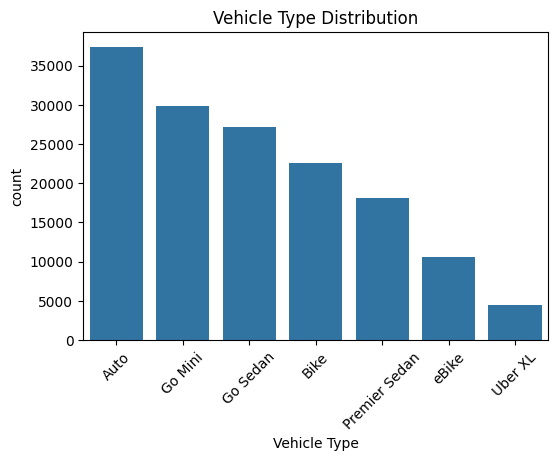

In [ ]:
# Vehicle Type distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Vehicle Type', order=df['Vehicle Type'].value_counts().index)
plt.title('Vehicle Type Distribution')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2537102870.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pickups.values, y=top_pickups.index, ax=ax[0], palette="viridis")
/tmp/ipython-input-2537102870.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drops.values, y=top_drops.index, ax=ax[1], palette="magma")


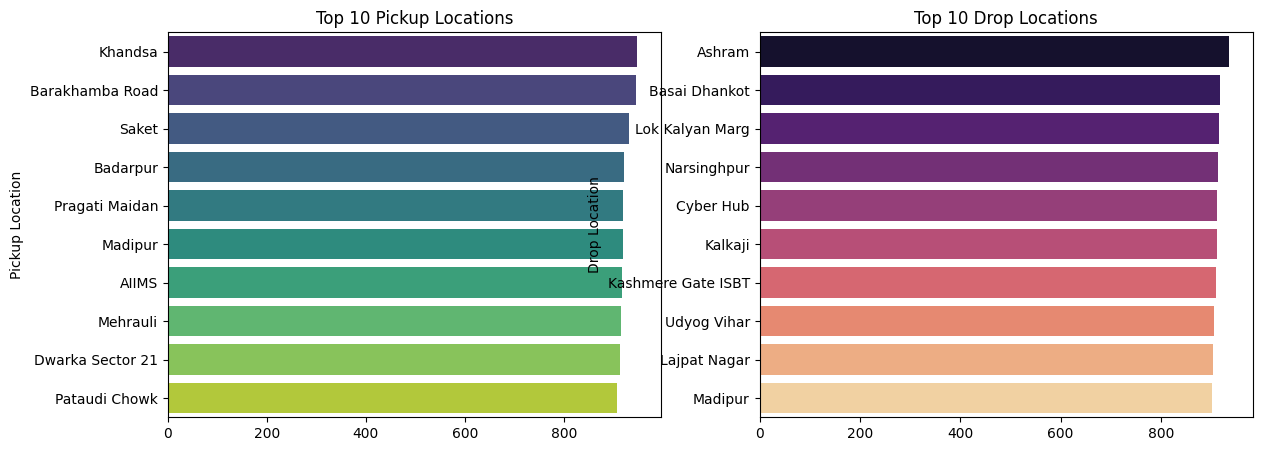

In [ ]:
# Top Pickup & Drop Locations
top_pickups = df['Pickup Location'].value_counts().nlargest(10)
top_drops = df['Drop Location'].value_counts().nlargest(10)

fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.barplot(x=top_pickups.values, y=top_pickups.index, ax=ax[0], palette="viridis")
sns.barplot(x=top_drops.values, y=top_drops.index, ax=ax[1], palette="magma")
ax[0].set_title('Top 10 Pickup Locations')
ax[1].set_title('Top 10 Drop Locations')
plt.show()

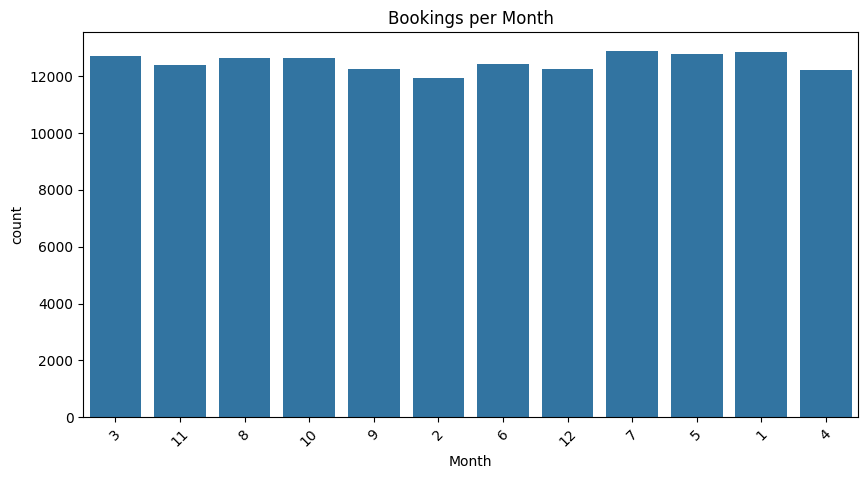

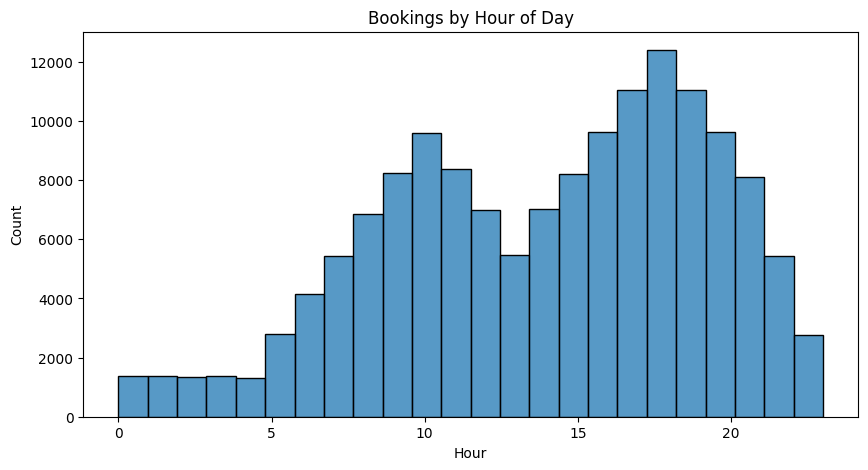

In [ ]:
# Bookings per month
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Month', order=df['Month'].dropna().unique())
plt.title("Bookings per Month")
plt.xticks(rotation=45)
plt.show()

# Bookings by hour
plt.figure(figsize=(10,5))
sns.histplot(df['Hour'].dropna(), bins=24, kde=False)
plt.title("Bookings by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-1314446122.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(cancel_stats.keys()), y=list(cancel_stats.values()), palette="Set2")


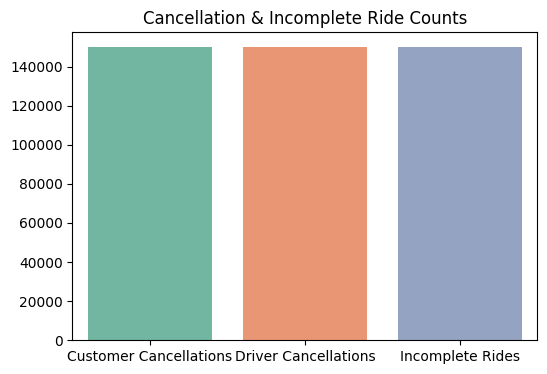

In [ ]:
# Cancelled rides by customer vs driver
cancel_stats = {
    "Customer Cancellations": df['Cancelled Rides by Customer'].notna().sum(),
    "Driver Cancellations": df['Cancelled Rides by Driver'].notna().sum(),
    "Incomplete Rides": df['Incomplete Rides'].notna().sum()
}

plt.figure(figsize=(6,4))
sns.barplot(x=list(cancel_stats.keys()), y=list(cancel_stats.values()), palette="Set2")
plt.title("Cancellation & Incomplete Ride Counts")
plt.show()

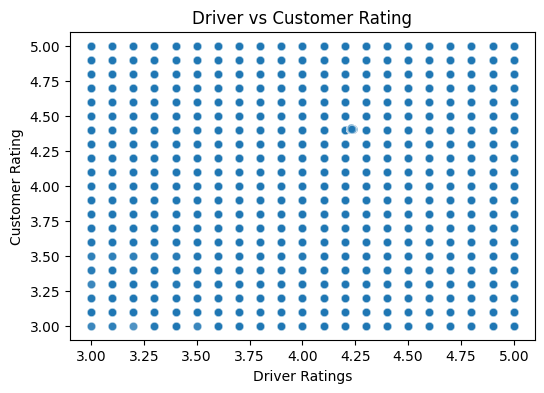

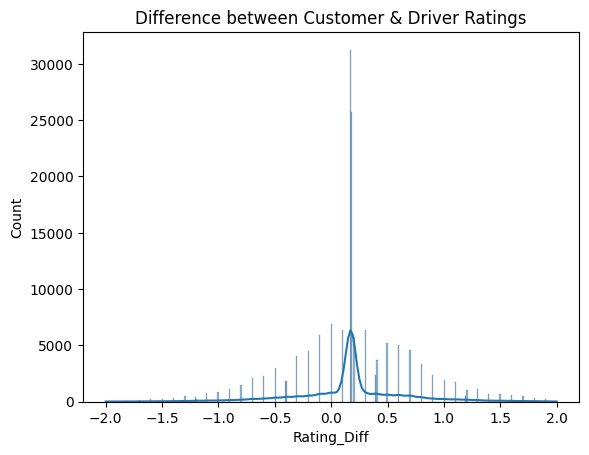

In [ ]:
# Rating comparison
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Driver Ratings', y='Customer Rating', alpha=0.4)
plt.title("Driver vs Customer Rating")
plt.show()

# Rating difference
df['Rating_Diff'] = df['Customer Rating'] - df['Driver Ratings']
sns.histplot(df['Rating_Diff'].dropna(), kde=True)
plt.title("Difference between Customer & Driver Ratings")
plt.show()

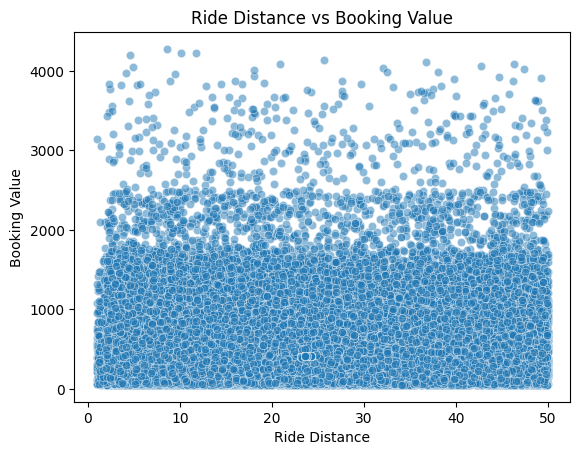

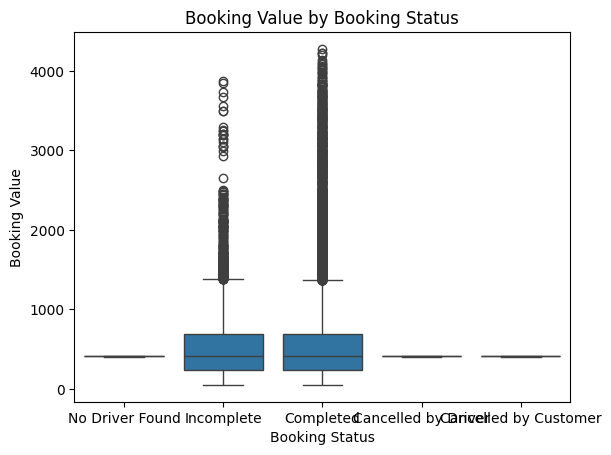

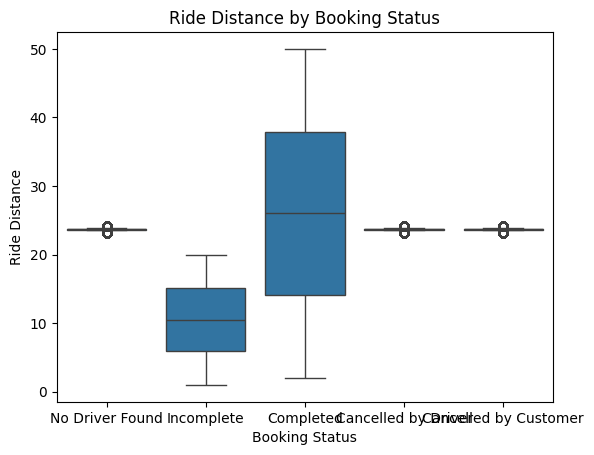

In [ ]:
sns.scatterplot(data=df, x='Ride Distance', y='Booking Value', alpha=0.5)
plt.title("Ride Distance vs Booking Value")
plt.show()

sns.boxplot(data=df, x='Booking Status', y='Booking Value')
plt.title("Booking Value by Booking Status")
plt.show()

sns.boxplot(data=df, x='Booking Status', y='Ride Distance')
plt.title("Ride Distance by Booking Status")
plt.show()

In [ ]:

fare_threshold = df['Booking Value'].quantile(0.75)
df['Is_Surge'] = (df['Booking Value'] > fare_threshold).astype(int)
# Verify surge distribution
print("\nSurge distribution:")
print(df['Is_Surge'].value_counts(normalize=True))


Surge distribution:
Is_Surge
0    0.75028
1    0.24972
Name: proportion, dtype: float64


In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler
string_cat_cols = ['Vehicle Type', 'Pickup Location', 'Drop Location', 'Payment Method']
le = LabelEncoder()

for col in string_cat_cols:
    if col in df.columns:
        df[col + '_Encoded'] = le.fit_transform(df[col])
        df.drop(col, axis=1, inplace=True)  # Drop original and keep encoded

# Encode other categorical columns (cancellation reasons, etc.)
other_cat_cols = ['Reason for cancelling by Customer', 'Driver Cancellation Reason',
                  'Incomplete Rides Reason', 'Booking Status','Is_Surge']

for col in other_cat_cols:
    if col in df.columns:
        df[col + '_Encoded'] = le.fit_transform(df[col].astype(str))
        df.drop(col, axis=1, inplace=True)

print("\nColumns after encoding:")
print(df.columns.tolist())


Columns after encoding:
['Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Original_Date', 'Hour', 'Day', 'Month', 'Weekday', 'Is_Weekend', 'Rating_Diff', 'Vehicle Type_Encoded', 'Pickup Location_Encoded', 'Drop Location_Encoded', 'Payment Method_Encoded', 'Reason for cancelling by Customer_Encoded', 'Driver Cancellation Reason_Encoded', 'Incomplete Rides Reason_Encoded', 'Booking Status_Encoded', 'Is_Surge_Encoded']


In [ ]:
df.head()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Original_Date,...,Rating_Diff,Vehicle Type_Encoded,Pickup Location_Encoded,Drop Location_Encoded,Payment Method_Encoded,Reason for cancelling by Customer_Encoded,Driver Cancellation Reason_Encoded,Incomplete Rides Reason_Encoded,Booking Status_Encoded,Is_Surge_Encoded
0,8.3,28.8,0.0,0.0,0.0,410.0,24.21,4.225614,4.403954,2024-03-23,...,0.178339,6,116,68,5,4,2,0,4,0
1,4.9,14.0,0.0,0.0,1.0,237.0,5.73,4.231812,4.409996,2024-11-29,...,0.178184,3,149,47,3,4,2,3,3,0
2,13.4,25.8,0.0,0.0,0.0,627.0,13.58,4.900000,4.900000,2024-08-23,...,0.000000,0,80,90,2,4,2,0,2,1
3,13.1,28.5,0.0,0.0,0.0,416.0,34.02,4.600000,5.000000,2024-10-21,...,0.400000,4,21,60,3,4,2,0,2,0
4,5.3,19.6,0.0,0.0,0.0,737.0,48.21,4.100000,4.300000,2024-09-16,...,0.200000,1,39,79,3,4,2,0,2,1


Weather Data Preprocessing

In [ ]:
weather_df=pd.read_csv('kaggel_weather_2013_to_2024.csv')
weather_df.head(15)

,Unnamed: 0,DATE,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,...,year-2000,weekofyear,tempmax_humidity,tempmin_humidity,temp_humidity,feelslikemax_humidity,feelslikemin_humidity,feelslike_humidity,temp_range,heat_index
0,0,4/14/2013,37.7,23.1,28.7,35.4,23.1,28.1,39.7,2.0,...,13,15,1496.69,917.07,1139.39,1405.38,917.07,1115.57,14.6,147.178118
1,1,4/15/2013,37.5,21.1,28.6,35.3,21.1,28.0,41.7,0.0,...,13,16,1563.75,879.87,1192.62,1472.01,879.87,1167.60,16.4,151.731061
2,2,4/16/2013,40.1,21.9,31.7,37.5,21.9,30.4,30.7,0.0,...,13,16,1231.07,672.33,973.19,1151.25,672.33,933.28,18.2,118.211133
3,3,4/17/2013,36.4,21.0,29.9,34.0,21.0,28.5,27.4,0.0,...,13,16,997.36,575.40,819.26,931.60,575.40,780.90,15.4,113.320354
4,4,4/18/2013,37.5,21.7,30.6,35.2,21.7,29.2,23.7,0.0,...,13,16,888.75,514.29,725.22,834.24,514.29,692.04,15.8,101.407038
5,5,4/19/2013,37.3,21.4,30.3,35.0,21.4,28.9,27.2,0.0,...,13,16,1014.56,582.08,824.16,952.00,582.08,786.08,15.9,111.986938
6,6,4/20/2013,37.7,22.2,30.6,36.0,22.2,29.4,27.8,0.0,...,13,16,1048.06,617.16,850.68,1000.80,617.16,817.32,15.5,113.056248
7,7,4/21/2013,37.0,23.9,28.4,35.4,23.9,28.1,39.5,0.0,...,13,16,1461.50,944.05,1121.80,1398.30,944.05,1109.95,13.1,147.732070
8,8,4/22/2013,31.7,21.1,26.9,31.3,21.1,26.7,49.5,0.0,...,13,17,1569.15,1044.45,1331.55,1549.35,1044.45,1321.65,10.6,172.992029
9,9,4/23/2013,34.0,23.3,29.1,33.2,23.3,28.6,42.8,0.0,...,13,17,1455.20,997.24,1245.48,1420.96,997.24,1224.08,10.7,152.154683


In [ ]:
# Clean weather data
if 'Unnamed: 0' in weather_df.columns:
    weather_df.drop(columns=['Unnamed: 0'], inplace=True)

weather_df['DATE'] = pd.to_datetime(weather_df['DATE'])

In [ ]:
#filling missing values with forward fill
weather_df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-2278850655.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_df.fillna(method='ffill', inplace=True)


In [ ]:
weather_df.head()

,DATE,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,...,year-2000,weekofyear,tempmax_humidity,tempmin_humidity,temp_humidity,feelslikemax_humidity,feelslikemin_humidity,feelslike_humidity,temp_range,heat_index
0,2013-04-14,37.7,23.1,28.7,35.4,23.1,28.1,39.7,2.0,100,...,13,15,1496.69,917.07,1139.39,1405.38,917.07,1115.57,14.6,147.178118
1,2013-04-15,37.5,21.1,28.6,35.3,21.1,28.0,41.7,0.0,0,...,13,16,1563.75,879.87,1192.62,1472.01,879.87,1167.60,16.4,151.731061
2,2013-04-16,40.1,21.9,31.7,37.5,21.9,30.4,30.7,0.0,0,...,13,16,1231.07,672.33,973.19,1151.25,672.33,933.28,18.2,118.211133
3,2013-04-17,36.4,21.0,29.9,34.0,21.0,28.5,27.4,0.0,0,...,13,16,997.36,575.40,819.26,931.60,575.40,780.90,15.4,113.320354
4,2013-04-18,37.5,21.7,30.6,35.2,21.7,29.2,23.7,0.0,0,...,13,16,888.75,514.29,725.22,834.24,514.29,692.04,15.8,101.407038


In [ ]:
weather_df.columns = weather_df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3557 entries, 0 to 3556
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   3557 non-null   datetime64[ns]
 1   tempmax                3557 non-null   float64       
 2   tempmin                3557 non-null   float64       
 3   temp                   3557 non-null   float64       
 4   feelslikemax           3557 non-null   float64       
 5   feelslikemin           3557 non-null   float64       
 6   feelslike              3557 non-null   float64       
 7   humidity               3557 non-null   float64       
 8   precip                 3557 non-null   float64       
 9   precipprob             3557 non-null   int64         
 10  precipcover            3557 non-null   float64       
 11  windspeed              3557 non-null   float64       
 12  sealevelpressure       3557 non-null   float64       
 13  con

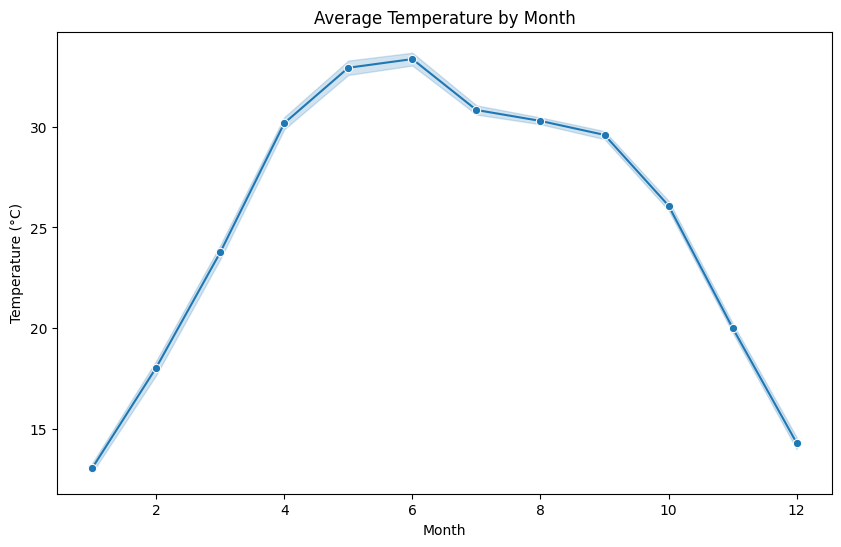

In [ ]:
#average monthly temperature
plt.figure(figsize=(10,6))
sns.lineplot(data=weather_df, x='month', y='temp', marker='o')
plt.title("Average Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()


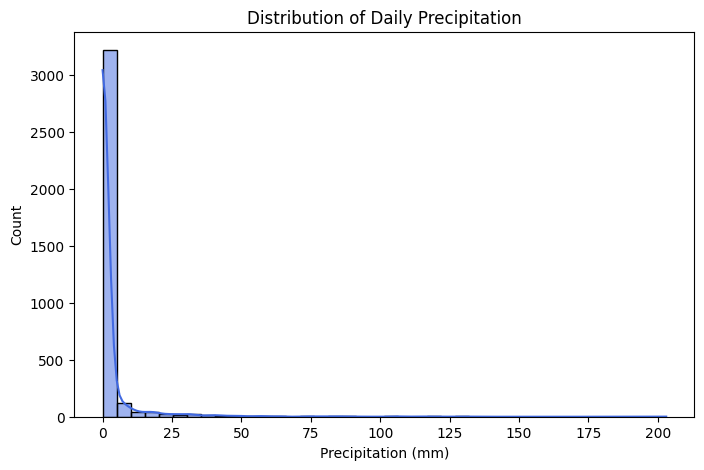

In [ ]:
#rain distribution
plt.figure(figsize=(8,5))
sns.histplot(weather_df['precip'], bins=40, kde=True, color='royalblue')
plt.title("Distribution of Daily Precipitation")
plt.xlabel("Precipitation (mm)")
plt.show()

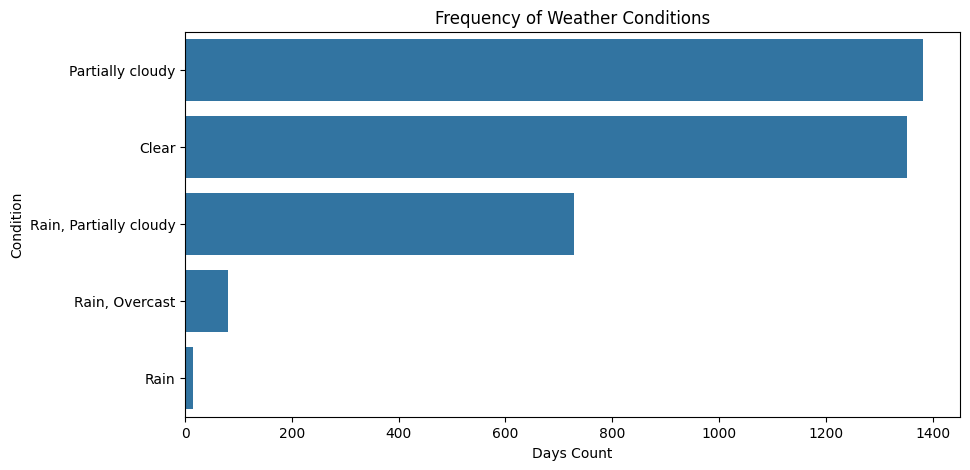

In [ ]:
#frequency weather distributions
plt.figure(figsize=(10,5))
sns.countplot(data=weather_df, y='conditions', order=weather_df['conditions'].value_counts().index)
plt.title("Frequency of Weather Conditions")
plt.xlabel("Days Count")
plt.ylabel("Condition")
plt.show()


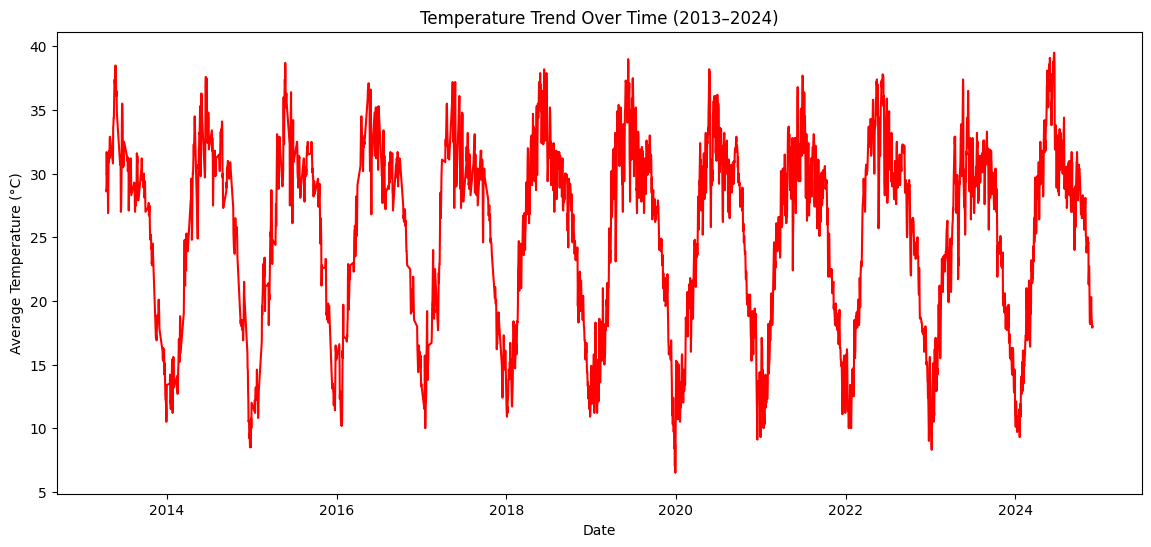

In [ ]:
#avg daily temp over time
plt.figure(figsize=(14,6))
sns.lineplot(data=weather_df, x='date', y='temp', color='red')
plt.title("Temperature Trend Over Time (2013–2024)")
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.show()


In [ ]:
# Filter weather data for 2024 (or adjust based on your ride data year)
weather_2024 = weather_df[weather_df['year'] == 2024].copy()
weather_2024.head()

,date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,...,year-2000,weekofyear,tempmax_humidity,tempmin_humidity,temp_humidity,feelslikemax_humidity,feelslikemin_humidity,feelslike_humidity,temp_range,heat_index
3222,2024-01-01,16.1,10.3,12.1,16.1,10.3,12.1,81.7,0.0,0,...,24,1,1315.37,841.51,988.57,1315.37,841.51,988.57,5.8,303.670138
3223,2024-01-02,16.3,9.0,11.2,16.3,7.9,11.0,82.2,0.0,0,...,24,1,1339.86,739.80,920.64,1339.86,649.38,904.20,7.3,311.705985
3224,2024-01-03,15.1,8.8,10.8,15.1,8.5,10.6,87.8,0.0,0,...,24,1,1325.78,772.64,948.24,1325.78,746.30,930.68,6.3,315.634544
3225,2024-01-04,11.5,8.0,10.1,11.5,6.8,9.7,92.7,0.0,0,...,24,1,1066.05,741.60,936.27,1066.05,630.36,899.19,3.5,320.306828
3226,2024-01-05,14.0,10.0,12.0,14.0,9.6,12.0,92.9,0.0,0,...,24,1,1300.60,929.00,1114.80,1300.60,891.84,1114.80,4.0,302.174724


In [ ]:
# Merge using the Original_Date we preserved
merged_df = pd.merge(df, weather_2024,
                     left_on='Original_Date',
                     right_on='date',
                     how='left')

In [ ]:
# Drop the redundant 'date' column from the weather data.
merged_df.drop(columns=['date'], inplace=True)

# Identify the weather columns that have missing values.
# Replace this list with the actual column names from your weather data.
weather_columns = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity', 'precip', 'precipprob', 'precipcover', 'windspeed', 'sealevelpressure', 'conditions', 'year', 'month', 'dayofweek', 'dayofyear', 'year-2000', 'weekofyear', 'tempmax_humidity', 'tempmin_humidity', 'temp_humidity', 'feelslikemax_humidity', 'feelslikemin_humidity', 'feelslike_humidity', 'temp_range', 'heat_index']

# Sort the DataFrame by date before filling to ensure the ffill propagates the correct daily values.
merged_df.sort_values(by='Original_Date', inplace=True)

# Fill missing weather data using forward-fill (ffill). This propagates the last valid daily value.
merged_df[weather_columns] = merged_df[weather_columns].ffill()

# You can now re-check the missing values to confirm.
print("Missing values after merge and fill:")
print(merged_df[weather_columns].isnull().sum())

Missing values after merge and fill:
tempmax                  0
tempmin                  0
temp                     0
feelslikemax             0
feelslikemin             0
feelslike                0
humidity                 0
precip                   0
precipprob               0
precipcover              0
windspeed                0
sealevelpressure         0
conditions               0
year                     0
month                    0
dayofweek                0
dayofyear                0
year-2000                0
weekofyear               0
tempmax_humidity         0
tempmin_humidity         0
temp_humidity            0
feelslikemax_humidity    0
feelslikemin_humidity    0
feelslike_humidity       0
temp_range               0
heat_index               0
dtype: int64


In [ ]:
merged_df.head()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Original_Date,...,year-2000,weekofyear,tempmax_humidity,tempmin_humidity,temp_humidity,feelslikemax_humidity,feelslikemin_humidity,feelslike_humidity,temp_range,heat_index
14378,7.7,43.4,0.0,0.0,0.0,523.0,22.13,4.600000,3.900000,2024-01-01,...,24.0,1.0,1315.37,841.51,988.57,1315.37,841.51,988.57,5.8,303.670138
136633,3.5,38.4,0.0,0.0,0.0,128.0,5.51,3.400000,4.200000,2024-01-01,...,24.0,1.0,1315.37,841.51,988.57,1315.37,841.51,988.57,5.8,303.670138
65488,6.8,28.6,0.0,1.0,0.0,416.0,23.67,4.231812,4.409996,2024-01-01,...,24.0,1.0,1315.37,841.51,988.57,1315.37,841.51,988.57,5.8,303.670138
34533,3.4,28.9,0.0,1.0,0.0,416.0,23.86,4.234865,4.403457,2024-01-01,...,24.0,1.0,1315.37,841.51,988.57,1315.37,841.51,988.57,5.8,303.670138
136605,6.1,30.6,0.0,0.0,0.0,788.0,8.57,4.300000,4.600000,2024-01-01,...,24.0,1.0,1315.37,841.51,988.57,1315.37,841.51,988.57,5.8,303.670138


In [ ]:
# Identify numerical columns for scaling
# Make sure to exclude any date-related columns
num_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove any columns that shouldn't be scaled (if they exist)
exclude_from_scaling = ['year', 'month_y', 'day_y']  # Weather date components
num_cols = [col for col in num_cols if col not in exclude_from_scaling]

print("\nNumerical columns to be scaled:", num_cols)


Numerical columns to be scaled: ['Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Is_Weekend', 'Rating_Diff', 'Vehicle Type_Encoded', 'Pickup Location_Encoded', 'Drop Location_Encoded', 'Payment Method_Encoded', 'Reason for cancelling by Customer_Encoded', 'Driver Cancellation Reason_Encoded', 'Incomplete Rides Reason_Encoded', 'Booking Status_Encoded', 'Is_Surge_Encoded', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity', 'precip', 'precipprob', 'precipcover', 'windspeed', 'sealevelpressure', 'month', 'dayofweek', 'dayofyear', 'year-2000', 'weekofyear', 'tempmax_humidity', 'tempmin_humidity', 'temp_humidity', 'feelslikemax_humidity', 'feelslikemin_humidity', 'feelslike_humidity', 'temp_range', 'heat_index']


In [ ]:
# Apply StandardScaler
scaler = StandardScaler()
merged_df[num_cols] = scaler.fit_transform(merged_df[num_cols])

print("\nFinal preprocessed data shape:", merged_df.shape)
print("Final columns:", merged_df.columns.tolist())
print("\nFirst few rows of preprocessed data:")
print(merged_df.head())


Final preprocessed data shape: (150000, 52)
Final columns: ['Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Original_Date', 'Hour', 'Day', 'Month', 'Weekday', 'Is_Weekend', 'Rating_Diff', 'Vehicle Type_Encoded', 'Pickup Location_Encoded', 'Drop Location_Encoded', 'Payment Method_Encoded', 'Reason for cancelling by Customer_Encoded', 'Driver Cancellation Reason_Encoded', 'Incomplete Rides Reason_Encoded', 'Booking Status_Encoded', 'Is_Surge_Encoded', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity', 'precip', 'precipprob', 'precipcover', 'windspeed', 'sealevelpressure', 'conditions', 'year', 'month', 'dayofweek', 'dayofyear', 'year-2000', 'weekofyear', 'tempmax_humidity', 'tempmin_humidity', 'temp_humidity', 'feelslikemax_humidity', 'feelslikemin_humidity', 'feelslike_humidity', 'temp_range', 'heat_index']

First few rows o


Preprocessed data saved to 'preprocessed_ride_data.csv'


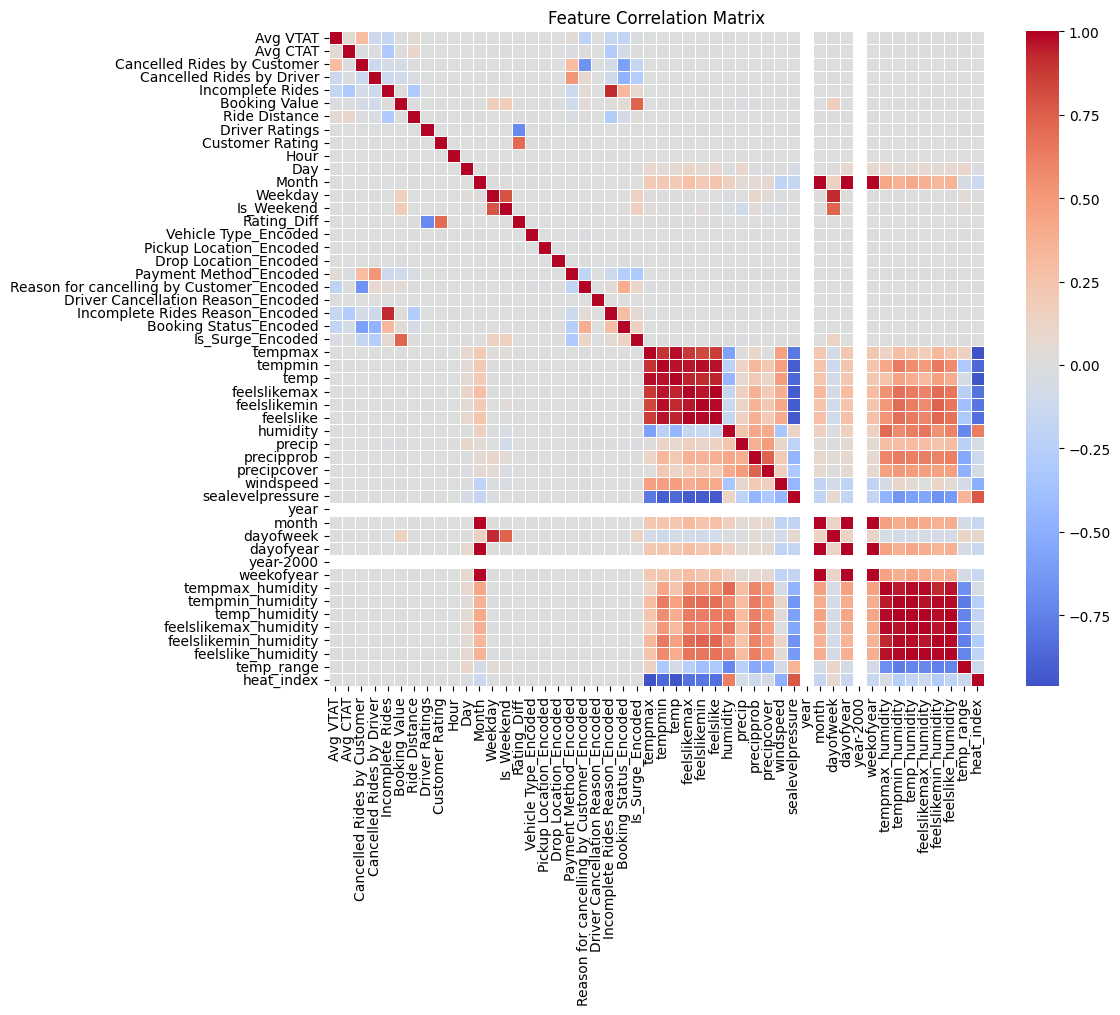


Preprocessing complete!
Final dataset shape: (150000, 52)
Target variable (Is_Surge_Encoded) distribution:
Is_Surge_Encoded
-0.576919    112542
 1.733345     37458
Name: count, dtype: int64


In [ ]:
# Save the preprocessed data
merged_df.to_csv('preprocessed_ride_data.csv', index=False)
print("\nPreprocessed data saved to 'preprocessed_ride_data.csv'")

# Display final correlation matrix
corr = merged_df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

print("\nPreprocessing complete!")
print(f"Final dataset shape: {merged_df.shape}")
print(f"Target variable (Is_Surge_Encoded) distribution:\n{merged_df['Is_Surge_Encoded'].value_counts()}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import numpy as np

# --- Assume 'df' is your preprocessed DataFrame from the notebook ---
# Let's make sure all categorical columns are encoded
categorical_cols = [c for c in df.columns if df[c].dtype == 'object' or df[c].dtype.name == 'category']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Define features (X) and target (y)
# We'll predict 'Booking Value'
X = df.drop(['Booking Value', 'Original_Date'], axis=1)
y = df['Booking Value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Baseline LightGBM Model ---
print("Training baseline LightGBM model...")
lgb_base = lgb.LGBMRegressor(random_state=42)
lgb_base.fit(X_train, y_train)

# Evaluate the baseline model
base_preds = lgb_base.predict(X_test)
base_rmse = np.sqrt(mean_squared_error(y_test, base_preds))
print(f"Baseline Model RMSE: {base_rmse}")

Training baseline LightGBM model...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Info] Start training from score 478.365142
Baseline Model RMSE: 214.88661196948703


In [ ]:
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 7.8 MB/s eta 0:00:00


Now that Optuna is installed, I will re-run the hyperparameter tuning cell.

In [ ]:
import optuna
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import numpy as np

def objective(trial):
    """Define the objective function for Optuna to optimize."""
    params = {
        'objective': 'regression_l1',
        'metric': 'rmse',
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'random_state': 42,
        'n_jobs': -1,
    }

    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
              callbacks=[lgb.early_stopping(100, verbose=False)])
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    return rmse

# Create an Optuna study and optimize
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50) # You can increase n_trials for more thorough search

print(f"Best trial RMSE: {study.best_value}")
print(f"Best hyperparameters: {study.best_params}")

# Train the final model with the best hyperparameters
best_params = study.best_params
lgb_tuned = lgb.LGBMRegressor(**best_params, random_state=42)
lgb_tuned.fit(X_train, y_train)

[I 2025-10-14 07:50:12,805] A new study created in memory with name: no-name-a41734fa-5ed1-4584-953f-03142d494497


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:50:20,302] Trial 0 finished with value: 220.02468182829125 and parameters: {'n_estimators': 1918, 'learning_rate': 0.09604496834631905, 'num_leaves': 279, 'max_depth': 4, 'min_child_samples': 68, 'subsample': 0.6227156166430884, 'colsample_bytree': 0.8134136278496449}. Best is trial 0 with value: 220.02468182829125.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:50:27,892] Trial 1 finished with value: 220.90755325099877 and parameters: {'n_estimators': 1081, 'learning_rate': 0.08453456026397037, 'num_leaves': 74, 'max_depth': 8, 'min_child_samples': 79, 'subsample': 0.8204767826236273, 'colsample_bytree': 0.9298609650927686}. Best is trial 0 with value: 220.02468182829125.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:50:30,570] Trial 2 finished with value: 220.74594028737366 and parameters: {'n_estimators': 1194, 'learning_rate': 0.23684824744892272, 'num_leaves': 230, 'max_depth': 6, 'min_child_samples': 22, 'subsample': 0.7685253637287267, 'colsample_bytree': 0.9577509615522335}. Best is trial 0 with value: 220.02468182829125.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:50:34,706] Trial 3 finished with value: 221.13775520467019 and parameters: {'n_estimators': 1827, 'learning_rate': 0.1878050238474872, 'num_leaves': 167, 'max_depth': 8, 'min_child_samples': 33, 'subsample': 0.9285273990141285, 'colsample_bytree': 0.6296581198702739}. Best is trial 0 with value: 220.02468182829125.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-10-14 07:50:40,598] Trial 4 finished with value: 220.7979694529232 and parameters: {'n_estimators': 652, 'learning_rate': 0.21419126518714685, 'num_leaves': 214, 'max_depth': 7, 'min_child_samples': 56, 'subsample': 0.9489156114863394, 'colsample_bytree': 0.956100902372348}. Best is trial 0 with value: 220.02468182829125.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:50:43,634] Trial 5 finished with value: 219.8962268880751 and parameters: {'n_estimators': 663, 'learning_rate': 0.18140157566722356, 'num_leaves': 109, 'max_depth': 4, 'min_child_samples': 19, 'subsample': 0.6296242775746081, 'colsample_bytree': 0.8205953738199402}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:50:47,640] Trial 6 finished with value: 221.171009999114 and parameters: {'n_estimators': 1392, 'learning_rate': 0.26337068337620806, 'num_leaves': 238, 'max_depth': 3, 'min_child_samples': 20, 'subsample': 0.8015624264854545, 'colsample_bytree': 0.9153203931021482}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:51:22,595] Trial 7 finished with value: 221.33127335678972 and parameters: {'n_estimators': 1943, 'learning_rate': 0.01035911900176385, 'num_leaves': 195, 'max_depth': 12, 'min_child_samples': 70, 'subsample': 0.7122352672657721, 'colsample_bytree': 0.770367534820878}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:51:47,512] Trial 8 finished with value: 220.1100240001831 and parameters: {'n_estimators': 1442, 'learning_rate': 0.013578723026063519, 'num_leaves': 189, 'max_depth': 5, 'min_child_samples': 11, 'subsample': 0.8945671822623413, 'colsample_bytree': 0.8908782973232154}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-10-14 07:51:52,041] Trial 9 finished with value: 220.93040779571191 and parameters: {'n_estimators': 892, 'learning_rate': 0.11959289270453725, 'num_leaves': 109, 'max_depth': 7, 'min_child_samples': 29, 'subsample': 0.8042878823160583, 'colsample_bytree': 0.8926293792530626}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038615 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000


[I 2025-10-14 07:51:54,742] Trial 10 finished with value: 220.35709092764728 and parameters: {'n_estimators': 583, 'learning_rate': 0.29697028566865225, 'num_leaves': 31, 'max_depth': 10, 'min_child_samples': 94, 'subsample': 0.6034302461517459, 'colsample_bytree': 0.7082778756255025}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:52:09,102] Trial 11 finished with value: 219.99852803230752 and parameters: {'n_estimators': 1672, 'learning_rate': 0.14946175483335158, 'num_leaves': 277, 'max_depth': 3, 'min_child_samples': 49, 'subsample': 0.6065167819282652, 'colsample_bytree': 0.8139992360944722}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:52:12,603] Trial 12 finished with value: 220.08788434920737 and parameters: {'n_estimators': 1582, 'learning_rate': 0.1577690142343614, 'num_leaves': 122, 'max_depth': 3, 'min_child_samples': 44, 'subsample': 0.6725485498836543, 'colsample_bytree': 0.8038678101578404}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-10-14 07:52:19,013] Trial 13 finished with value: 220.11680339862002 and parameters: {'n_estimators': 1650, 'learning_rate': 0.15054630594006446, 'num_leaves': 273, 'max_depth': 5, 'min_child_samples': 45, 'subsample': 0.672102530907171, 'colsample_bytree': 0.7366232172000757}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:52:22,396] Trial 14 finished with value: 220.3265935534285 and parameters: {'n_estimators': 870, 'learning_rate': 0.1836408399382179, 'num_leaves': 120, 'max_depth': 3, 'min_child_samples': 6, 'subsample': 0.728892837939152, 'colsample_bytree': 0.846753898532375}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-10-14 07:52:30,401] Trial 15 finished with value: 219.99343209547618 and parameters: {'n_estimators': 956, 'learning_rate': 0.0683999239784124, 'num_leaves': 298, 'max_depth': 5, 'min_child_samples': 53, 'subsample': 0.6523541539644322, 'colsample_bytree': 0.672120881997889}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:52:37,904] Trial 16 finished with value: 220.0605004932669 and parameters: {'n_estimators': 791, 'learning_rate': 0.0539285483681769, 'num_leaves': 66, 'max_depth': 5, 'min_child_samples': 58, 'subsample': 0.6619871276716642, 'colsample_bytree': 0.6137096907303135}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038786 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-10-14 07:52:46,370] Trial 17 finished with value: 220.13455585934898 and parameters: {'n_estimators': 1017, 'learning_rate': 0.06402248143917015, 'num_leaves': 153, 'max_depth': 6, 'min_child_samples': 36, 'subsample': 0.7409282930948509, 'colsample_bytree': 0.6680485993764868}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-10-14 07:52:50,872] Trial 18 finished with value: 221.3041506117641 and parameters: {'n_estimators': 719, 'learning_rate': 0.11674711933988138, 'num_leaves': 148, 'max_depth': 10, 'min_child_samples': 87, 'subsample': 0.9964250031962115, 'colsample_bytree': 0.7005634714464993}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:53:02,792] Trial 19 finished with value: 220.12167370009558 and parameters: {'n_estimators': 534, 'learning_rate': 0.040824952576053036, 'num_leaves': 86, 'max_depth': 4, 'min_child_samples': 62, 'subsample': 0.6471190839864173, 'colsample_bytree': 0.8582083637124422}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-10-14 07:53:05,848] Trial 20 finished with value: 220.53874230775003 and parameters: {'n_estimators': 1012, 'learning_rate': 0.1872475705339137, 'num_leaves': 24, 'max_depth': 6, 'min_child_samples': 17, 'subsample': 0.7034725428101053, 'colsample_bytree': 0.9954725066891984}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:53:15,215] Trial 21 finished with value: 220.02285742489437 and parameters: {'n_estimators': 1282, 'learning_rate': 0.14117972520234423, 'num_leaves': 297, 'max_depth': 4, 'min_child_samples': 46, 'subsample': 0.6003389180356454, 'colsample_bytree': 0.7717726199016307}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:53:18,845] Trial 22 finished with value: 219.96259236877162 and parameters: {'n_estimators': 1659, 'learning_rate': 0.2219694335353171, 'num_leaves': 253, 'max_depth': 4, 'min_child_samples': 49, 'subsample': 0.6385376496006645, 'colsample_bytree': 0.8375818351696889}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:53:23,962] Trial 23 finished with value: 220.03921509427036 and parameters: {'n_estimators': 1151, 'learning_rate': 0.21716304529919217, 'num_leaves': 253, 'max_depth': 4, 'min_child_samples': 78, 'subsample': 0.6516300099533053, 'colsample_bytree': 0.7715782877698}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:53:27,684] Trial 24 finished with value: 220.3691689092872 and parameters: {'n_estimators': 909, 'learning_rate': 0.26273166573121454, 'num_leaves': 294, 'max_depth': 5, 'min_child_samples': 38, 'subsample': 0.695366218888537, 'colsample_bytree': 0.8400711240410715}. Best is trial 5 with value: 219.8962268880751.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038662 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-10-14 07:53:36,268] Trial 25 finished with value: 219.67738882232473 and parameters: {'n_estimators': 736, 'learning_rate': 0.20723066342292742, 'num_leaves': 261, 'max_depth': 4, 'min_child_samples': 25, 'subsample': 0.7621580674199748, 'colsample_bytree': 0.6625626912561406}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:53:39,472] Trial 26 finished with value: 220.03894801406548 and parameters: {'n_estimators': 763, 'learning_rate': 0.23023124758975172, 'num_leaves': 252, 'max_depth': 4, 'min_child_samples': 27, 'subsample': 0.852612378288421, 'colsample_bytree': 0.7395666703656707}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:53:42,736] Trial 27 finished with value: 220.83339514363377 and parameters: {'n_estimators': 1465, 'learning_rate': 0.26037898521938113, 'num_leaves': 206, 'max_depth': 6, 'min_child_samples': 13, 'subsample': 0.7398156841847218, 'colsample_bytree': 0.8749863923726511}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:53:46,353] Trial 28 finished with value: 221.21403311439133 and parameters: {'n_estimators': 1288, 'learning_rate': 0.20682245772596858, 'num_leaves': 171, 'max_depth': 9, 'min_child_samples': 26, 'subsample': 0.7697852687652191, 'colsample_bytree': 0.822984776509058}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:53:53,924] Trial 29 finished with value: 220.02081205379505 and parameters: {'n_estimators': 1821, 'learning_rate': 0.17560791875948523, 'num_leaves': 256, 'max_depth': 3, 'min_child_samples': 6, 'subsample': 0.6288516564909571, 'colsample_bytree': 0.7864924796639718}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:53:57,619] Trial 30 finished with value: 222.21516351374848 and parameters: {'n_estimators': 505, 'learning_rate': 0.23969786129147003, 'num_leaves': 227, 'max_depth': 12, 'min_child_samples': 40, 'subsample': 0.8710037304822706, 'colsample_bytree': 0.7446485672959392}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-10-14 07:54:03,430] Trial 31 finished with value: 220.1682518328611 and parameters: {'n_estimators': 647, 'learning_rate': 0.2027114405166776, 'num_leaves': 270, 'max_depth': 5, 'min_child_samples': 69, 'subsample': 0.6298729279207655, 'colsample_bytree': 0.657479732015716}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-10-14 07:54:11,742] Trial 32 finished with value: 219.8157012332979 and parameters: {'n_estimators': 976, 'learning_rate': 0.1000563321218963, 'num_leaves': 299, 'max_depth': 4, 'min_child_samples': 52, 'subsample': 0.6390610859937155, 'colsample_bytree': 0.6624487904741942}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038000 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-10-14 07:54:21,869] Trial 33 finished with value: 219.94475348444328 and parameters: {'n_estimators': 1086, 'learning_rate': 0.10196827780355021, 'num_leaves': 261, 'max_depth': 4, 'min_child_samples': 61, 'subsample': 0.677643069807663, 'colsample_bytree': 0.697976109345213}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-10-14 07:54:30,077] Trial 34 finished with value: 220.02067294334518 and parameters: {'n_estimators': 1115, 'learning_rate': 0.09725974683071738, 'num_leaves': 51, 'max_depth': 4, 'min_child_samples': 60, 'subsample': 0.767146202470678, 'colsample_bytree': 0.637549199057239}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-10-14 07:54:34,164] Trial 35 finished with value: 220.2913226692041 and parameters: {'n_estimators': 820, 'learning_rate': 0.09766172668156145, 'num_leaves': 95, 'max_depth': 6, 'min_child_samples': 78, 'subsample': 0.6893621901335709, 'colsample_bytree': 0.6983184166072457}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:54:38,553] Trial 36 finished with value: 220.54180305292874 and parameters: {'n_estimators': 679, 'learning_rate': 0.12252322929587896, 'num_leaves': 230, 'max_depth': 7, 'min_child_samples': 65, 'subsample': 0.679013930267776, 'colsample_bytree': 0.6060051756651316}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-10-14 07:54:46,727] Trial 37 finished with value: 220.08830142553282 and parameters: {'n_estimators': 1058, 'learning_rate': 0.1670154982471092, 'num_leaves': 280, 'max_depth': 3, 'min_child_samples': 33, 'subsample': 0.721023985841102, 'colsample_bytree': 0.6467184896419058}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:54:53,383] Trial 38 finished with value: 220.17345564937105 and parameters: {'n_estimators': 1178, 'learning_rate': 0.1400618275226257, 'num_leaves': 137, 'max_depth': 4, 'min_child_samples': 21, 'subsample': 0.7609952046983859, 'colsample_bytree': 0.7209153865616045}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:55:01,239] Trial 39 finished with value: 220.745914662093 and parameters: {'n_estimators': 957, 'learning_rate': 0.08394074983501393, 'num_leaves': 176, 'max_depth': 8, 'min_child_samples': 74, 'subsample': 0.8249845719039959, 'colsample_bytree': 0.6840813693219325}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:55:06,262] Trial 40 finished with value: 220.04783677278675 and parameters: {'n_estimators': 609, 'learning_rate': 0.11076859852506482, 'num_leaves': 220, 'max_depth': 5, 'min_child_samples': 15, 'subsample': 0.6185161809851113, 'colsample_bytree': 0.625717796175208}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:55:12,314] Trial 41 finished with value: 219.86666305514154 and parameters: {'n_estimators': 1355, 'learning_rate': 0.24377794879130268, 'num_leaves': 244, 'max_depth': 4, 'min_child_samples': 50, 'subsample': 0.6358393877006608, 'colsample_bytree': 0.8272744803063548}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-10-14 07:55:16,139] Trial 42 finished with value: 219.92654326957108 and parameters: {'n_estimators': 1375, 'learning_rate': 0.24542097226281664, 'num_leaves': 238, 'max_depth': 4, 'min_child_samples': 54, 'subsample': 0.6225763945864539, 'colsample_bytree': 0.6857223795961888}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:55:19,326] Trial 43 finished with value: 220.71988148024317 and parameters: {'n_estimators': 1378, 'learning_rate': 0.2838702558298799, 'num_leaves': 243, 'max_depth': 3, 'min_child_samples': 53, 'subsample': 0.6175971940815688, 'colsample_bytree': 0.7537354396469}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:55:25,544] Trial 44 finished with value: 221.17069905006304 and parameters: {'n_estimators': 1512, 'learning_rate': 0.24305946947278936, 'num_leaves': 283, 'max_depth': 3, 'min_child_samples': 41, 'subsample': 0.6395529582722607, 'colsample_bytree': 0.924463384268556}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:55:29,347] Trial 45 finished with value: 220.16225779387784 and parameters: {'n_estimators': 1321, 'learning_rate': 0.19704579461059707, 'num_leaves': 189, 'max_depth': 5, 'min_child_samples': 31, 'subsample': 0.9246596157307321, 'colsample_bytree': 0.7941649511750527}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:55:32,126] Trial 46 finished with value: 220.03868617827737 and parameters: {'n_estimators': 1223, 'learning_rate': 0.2464608629283831, 'num_leaves': 235, 'max_depth': 4, 'min_child_samples': 24, 'subsample': 0.6622504545167929, 'colsample_bytree': 0.7232684639050766}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:55:37,749] Trial 47 finished with value: 220.65218661908418 and parameters: {'n_estimators': 1358, 'learning_rate': 0.22755026735574962, 'num_leaves': 205, 'max_depth': 3, 'min_child_samples': 53, 'subsample': 0.6148040460585045, 'colsample_bytree': 0.8186473558879783}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:55:40,547] Trial 48 finished with value: 220.9355223783587 and parameters: {'n_estimators': 730, 'learning_rate': 0.2710751915953086, 'num_leaves': 265, 'max_depth': 5, 'min_child_samples': 34, 'subsample': 0.7110414624922202, 'colsample_bytree': 0.9058281594581263}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 414.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-10-14 07:55:43,335] Trial 49 finished with value: 220.82577722349924 and parameters: {'n_estimators': 841, 'learning_rate': 0.2544249511135195, 'num_leaves': 288, 'max_depth': 6, 'min_child_samples': 19, 'subsample': 0.659123274663703, 'colsample_bytree': 0.8732429105712347}. Best is trial 25 with value: 219.67738882232473.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best trial RMSE: 219.67738882232473
Best hyperparameters: {'n_estimators': 736, 'learning_rate': 0.20723066342292742, 'num_leaves': 261, 'max_depth': 4, 'min_child_samples': 25, 'subsample': 0.7621580674199748, 'colsample_bytree': 0.6625626912561406}
[LightGBM] [Warning] Found whitespace in feature_names, replace with under

LGBMRegressor(colsample_bytree=0.6625626912561406,
              learning_rate=0.20723066342292742, max_depth=4,
              min_child_samples=25, n_estimators=736, num_leaves=261,
              random_state=42, subsample=0.7621580674199748)

In [ ]:
%pip install mlflow lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.1/329.1 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.4/718.4 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/

Now that MLflow is installed, I will re-run the cell to log the tuned LightGBM model.

In [ ]:
import mlflow
import mlflow.lightgbm
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Set up MLflow experiment
mlflow.set_experiment("Ride Surge Prediction")

# Start an MLflow run
with mlflow.start_run(run_name="Tuned LightGBM"):
    print("Starting MLflow run...")
    # Log the best hyperparameters
    mlflow.log_params(study.best_params)

    # Train the final model with the best parameters
    lgb_final = lgb.LGBMRegressor(**study.best_params, random_state=42)
    lgb_final.fit(X_train, y_train)

    # Make predictions and calculate metrics
    final_preds = lgb_final.predict(X_test)
    final_rmse = np.sqrt(mean_squared_error(y_test, final_preds))

    # Log the performance metric
    mlflow.log_metric("rmse", final_rmse)
    print(f"Final Tuned Model RMSE: {final_rmse}")

    # Log the model
    mlflow.lightgbm.log_model(lgb_final, "lgbm-ride-surge-model")

    print("MLflow run completed.")
    print(f"To view your experiment, run 'mlflow ui' in your terminal.")

# The trained and tuned model is now stored in MLflow!

2025/10/14 07:56:19 INFO mlflow.tracking.fluent: Experiment with name 'Ride Surge Prediction' does not exist. Creating a new experiment.


Starting MLflow run...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 23
[LightGBM] [Info] Start training from score 478.365142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

2025/10/14 07:56:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Tuned Model RMSE: 217.68588404264085


2025/10/14 07:56:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run completed.
To view your experiment, run 'mlflow ui' in your terminal.


In [ ]:
# First, ensure you have xgboost and optuna installed
# !pip install xgboost optuna

import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import optuna
import mlflow
import mlflow.xgboost
from sklearn.metrics import mean_squared_error
import numpy as np

# --- Assume 'df' is your preprocessed DataFrame ---
# If not, please run your data preparation code first.
# For example:
# df = pd.read_csv('ncr_ride_bookings.csv')
# ... (all your preprocessing steps) ...

# Define features (X) and target (y)
X = df.drop(['Booking Value', 'Original_Date'], axis=1)
y = df['Booking Value']

# Convert categorical columns to a type XGBoost can handle
# XGBoost natively handles pandas category dtype, so this is good practice
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    X[col] = X[col].astype('category')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- 1. Hyperparameter Tuning with Optuna ---

def objective_xgb(trial):
    """Define the objective function for Optuna to optimize for XGBoost."""
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'n_estimators': trial.suggest_int('n_estimators', 500, 2500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'random_state': 42,
        'n_jobs': -1,
        'tree_method': 'hist', # Use the fast histogram-based method
        'enable_categorical': True # Natively handle categorical features
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    return rmse

print("Starting XGBoost hyperparameter tuning with Optuna...")
study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=50) # Increase n_trials for a more thorough search

print(f"Best trial RMSE for XGBoost: {study_xgb.best_value}")
print(f"Best hyperparameters: {study_xgb.best_params}")


# --- 2. MLflow Integration for the Tuned XGBoost Model ---

mlflow.set_experiment("Ride Surge Prediction")

with mlflow.start_run(run_name="Tuned XGBoost"):
    print("\nStarting MLflow run for the final XGBoost model...")

    # Log the best hyperparameters
    mlflow.log_params(study_xgb.best_params)

    # Train the final model with the best parameters
    xgb_final = xgb.XGBRegressor(
        **study_xgb.best_params,
        random_state=42,
        tree_method='hist',
        enable_categorical=True
    )
    xgb_final.fit(X_train, y_train)

    # Make predictions and calculate final metrics
    final_preds = xgb_final.predict(X_test)
    final_rmse = np.sqrt(mean_squared_error(y_test, final_preds))

    # Log the performance metric
    mlflow.log_metric("rmse", final_rmse)
    print(f"Final Tuned XGBoost Model RMSE: {final_rmse}")

    # Log the model artifact
    mlflow.xgboost.log_model(xgb_final, "xgb-ride-surge-model")

    print("MLflow run completed.")
    print("To view your experiment, run 'mlflow ui' in your terminal.")

[I 2025-10-14 07:56:38,972] A new study created in memory with name: no-name-1663f90b-d8a0-4501-a39a-699155c2a436


Starting XGBoost hyperparameter tuning with Optuna...


[I 2025-10-14 07:57:59,802] Trial 0 finished with value: 224.2560736467327 and parameters: {'n_estimators': 1568, 'learning_rate': 0.07922468617209563, 'max_depth': 12, 'subsample': 0.9633179506593779, 'colsample_bytree': 0.6286397586473682, 'min_child_weight': 10, 'gamma': 0.4815757609925142}. Best is trial 0 with value: 224.2560736467327.
[I 2025-10-14 07:59:17,158] Trial 1 finished with value: 232.60515694400956 and parameters: {'n_estimators': 1915, 'learning_rate': 0.14838671178290155, 'max_depth': 9, 'subsample': 0.6267339979624433, 'colsample_bytree': 0.591934295590773, 'min_child_weight': 1, 'gamma': 0.17155345825877777}. Best is trial 0 with value: 224.2560736467327.
[I 2025-10-14 08:00:36,626] Trial 2 finished with value: 226.56308862300872 and parameters: {'n_estimators': 2320, 'learning_rate': 0.15342551580952943, 'max_depth': 12, 'subsample': 0.9694203295641168, 'colsample_bytree': 0.843792645783433, 'min_child_weight': 1, 'gamma': 0.4034306925870975}. Best is trial 0 with

Best trial RMSE for XGBoost: 213.84558326250686
Best hyperparameters: {'n_estimators': 1118, 'learning_rate': 0.010342721779000327, 'max_depth': 3, 'subsample': 0.9530699767916092, 'colsample_bytree': 0.6611763453876313, 'min_child_weight': 6, 'gamma': 0.2791076296801313}

Starting MLflow run for the final XGBoost model...


2025/10/14 08:19:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Tuned XGBoost Model RMSE: 213.84558326250686


/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:1028: UserWarning: [08:19:05] WARNING: /workspace/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)
2025/10/14 08:19:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run completed.
To view your experiment, run 'mlflow ui' in your terminal.
